In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load data
df = pd.read_csv('data/Instagram_data.csv', encoding='latin1')
print("Data loaded successfully!")
print(df.info())
print(df.head())

Data loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB
None
   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98  

In [46]:
# Top 5 posts by Likes
df.sort_values('Likes', ascending=False).head(5)[['Likes','Caption','Hashtags']]


,Likes,Caption,Hashtags
117,549,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
118,443,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...
40,416,280 Machine Learning Projects Solved & Explain...,#data #datascience #dataanalysis #dataanalytic...
107,416,Here is a list of 100+ Machine Learning Algori...,#machinelearning #machinelearningalgorithms #d...
114,373,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...


In [55]:
# Engagement Rate Analysis
df['Engagement Rate'] = (df['Likes']+ df['Comments'])/df['Impressions']*100
df.sort_values('Engagement Rate', ascending=False).head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Engagement Rate
16,4002,3401,278,128,73,111,17,18,205,16,2,Here are some of the highest paying skills in ...,#career #job #jobs #jobsearch #education #busi...,5.547226
83,4002,3401,278,128,73,111,17,18,205,16,2,Here are some of the highest paying skills in ...,#career #job #jobs #jobsearch #education #busi...,5.547226
45,4298,3050,969,181,64,263,6,19,225,21,4,Here are some of the best Python project ideas...,#python #pythonprogramming #pythonprojects #py...,5.374593
99,5409,2643,2006,1068,230,393,10,27,275,38,14,Here is a complete roadmap to data science tha...,#data #datascience #dataanalysis #dataanalytic...,5.268996
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,5.083400


<Axes: xlabel='Hashtag Count', ylabel='Likes'>

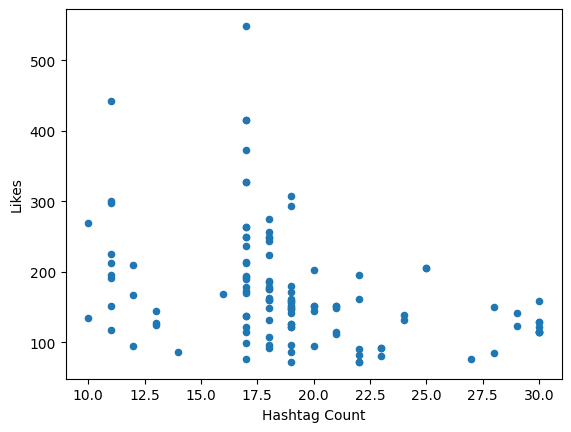

In [7]:
# Count hashtags per post
df['Hashtag Count']=df['Hashtags'].str.count('#')
df.plot.scatter(x='Hashtag Count', y='Likes')

<Axes: >

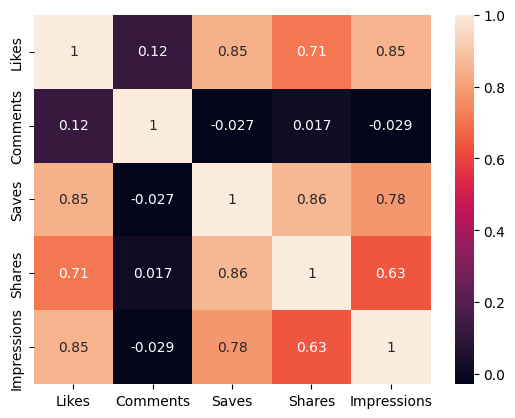

In [9]:
import seaborn as sns
sns.heatmap(df[['Likes', 'Comments', 'Saves', 'Shares', 'Impressions']].corr(), annot=True)

In [33]:
# Assuming df['Hashtags'] contains strings like "#Python #AI #Data"
top_hashtags = (
    df['Hashtags'].dropna()               # Remove NaN values
    .str.split('#')                       # Split by '#'
    .explode()                            # Flatten into one list
    .str.strip()                          # Remove whitespace
    .loc[lambda x: x != '']               # Remove empty strings
    .value_counts()                       # Count occurrences
    .head(10)                             # Get top 10
)                       # Get top 10
print(top_hashtags)

Hashtags
thecleverprogrammer       117
amankharwal               117
python                    109
machinelearning            97
pythonprogramming          95
datascience                94
ai                         91
pythonprojects             90
artificialintelligence     89
data                       88
Name: count, dtype: int64


<Axes: title={'center': 'Cumulative Followers Over Time'}>

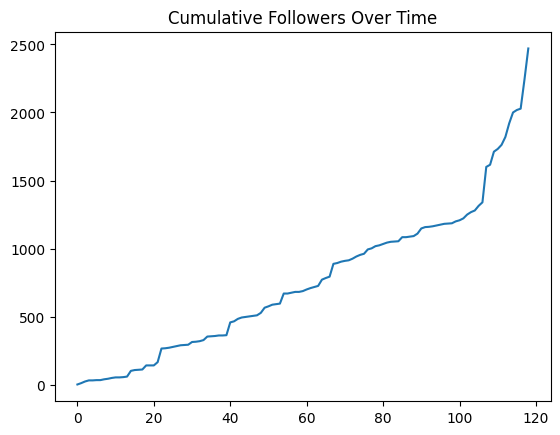

In [34]:
df['Follows'].cumsum().plot(title='Cumulative Followers Over Time')